# Define the McCulloch-Pitts Neuron Model: 
It is a binary threshold-based neuron. However, XOR cannot be solved using a single layer of such neurons because it is not linearly separable. Thus, we need a multi-layer network.
Train the network to model XOR: We'll implement a 3-layer network (input, hidden, output) with a basic learning rule.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def activation(x):
    return np.where(x >= 0, 1, 0)  # Threshold function (binary step)


In [6]:
# XOR input data (2-dimensional)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# XOR output data (labels)
y = np.array([[0], [1], [1], [0]])


In [7]:
input_size = 2  # Two inputs
hidden_size = 2  # Two neurons in the hidden layer
output_size = 1  # One output (binary)

# Random initialization of weights and biases
W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
b1 = np.random.uniform(-1, 1, (1, hidden_size))
W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
b2 = np.random.uniform(-1, 1, (1, output_size))


In [8]:
def forward(X, W1, b1, W2, b2):
    # First layer (hidden layer)
    z1 = np.dot(X, W1) + b1
    a1 = activation(z1)  # Activation function (threshold unit)
    
    # Second layer (output layer)
    z2 = np.dot(a1, W2) + b2
    a2 = activation(z2)
    
    return a1, a2


In [9]:
def train(X, y, W1, b1, W2, b2, epochs=10000, lr=0.1):
    error_list = []
    
    for epoch in range(epochs):
        # Forward pass
        a1, a2 = forward(X, W1, b1, W2, b2)
        
        # Compute the error
        error = y - a2
        
        # Store the sum of squared errors to track convergence
        sse = np.sum(error ** 2)
        error_list.append(sse)
        
        # Backpropagation (weight update)
        dW2 = np.dot(a1.T, error)
        db2 = np.sum(error, axis=0, keepdims=True)
        
        delta1 = np.dot(error, W2.T) * (a1 * (1 - a1))  # Gradient at hidden layer
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        # Update weights and biases
        W1 += lr * dW1
        b1 += lr * db1
        W2 += lr * dW2
        b2 += lr * db2
    
    return W1, b1, W2, b2, error_list


In [10]:
# Train the network
W1, b1, W2, b2, error_list = train(X, y, W1, b1, W2, b2, epochs=10000, lr=0.1)


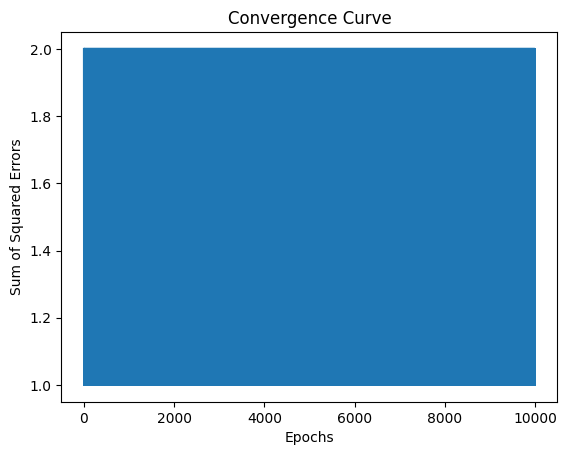

In [11]:
plt.plot(error_list)
plt.title('Convergence Curve')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.show()


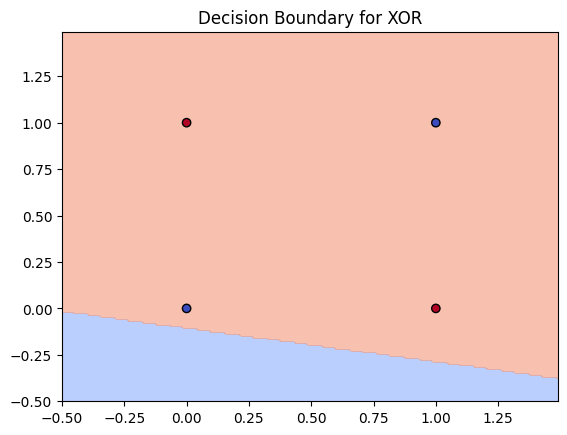

In [12]:
def plot_decision_boundary(W1, b1, W2, b2):
    # Create a grid of points
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Perform forward pass on each point in the grid
    _, Z = forward(grid, W1, b1, W2, b2)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap='coolwarm')
    plt.title('Decision Boundary for XOR')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(W1, b1, W2, b2)


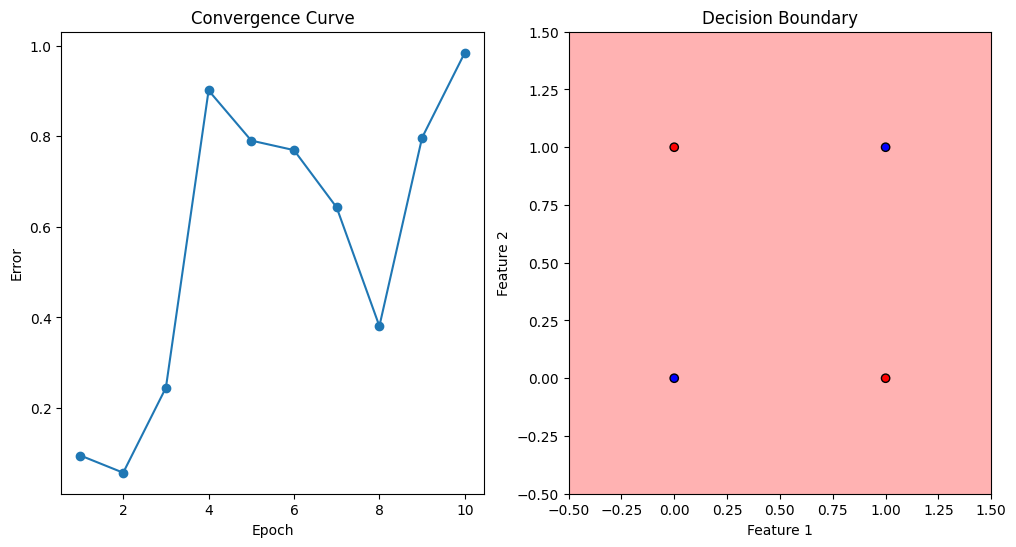

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def activation(x):
    return np.where(x >= 0, 1, 0)

def xor_network(X):
    # Define the weights and biases for the McCulloch-Pitts neurons
    W1 = np.array([[1, 1], [1, 1], [-1, -1]])
    b1 = np.array([-1, -1, 2])
    
    W2 = np.array([[1, -1, -1]])
    b2 = np.array([-0.5])
    
    # Compute the outputs of the first layer
    z1 = np.dot(X, W1.T) + b1
    a1 = activation(z1)
    
    # Compute the outputs of the second layer
    z2 = np.dot(a1, W2.T) + b2
    a2 = activation(z2)
    
    return a2

# Define XOR inputs and targets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Run the network
outputs = xor_network(X)

# Dummy error data for convergence curve (assuming 10 epochs for visualization)
epochs = np.arange(1, 11)
errors = np.random.uniform(0, 1, len(epochs))  # Random error values for demonstration

plt.figure(figsize=(12, 6))

# Convergence Curve (dummy)
plt.subplot(1, 2, 1)
plt.plot(epochs, errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Convergence Curve')

# Decision Boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = xor_network(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Use only the first output for contour

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 1], colors=['red', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.bwr)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

plt.show()


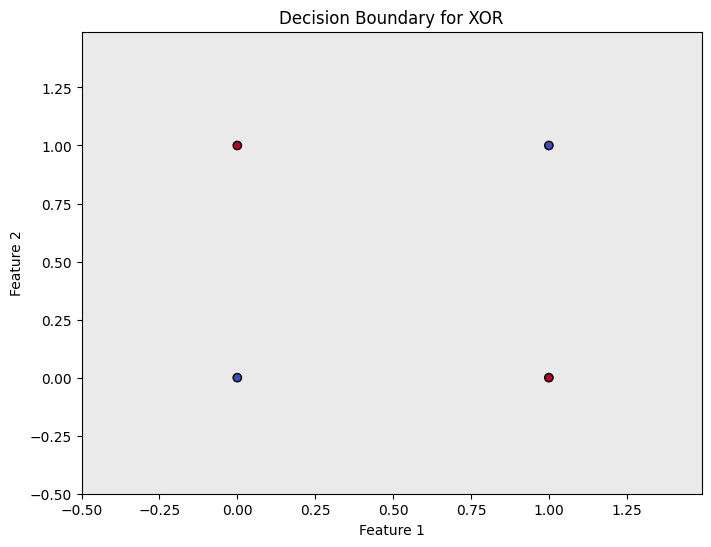

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def activation(x):
    return np.where(x >= 0, 1, 0)
def forward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1.T) + b1
    a1 = activation(z1)
    z2 = np.dot(a1, W2.T) + b2
    a2 = activation(z2)
    return a1, a2

def plot_decision_boundary(W1, b1, W2, b2):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    _, Z = forward(grid, W1, b1, W2, b2)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=[-0.1, 0.1], cmap='coolwarm', alpha=0.6)
    plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--')
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap='coolwarm', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary for XOR')
    plt.show()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
W1 = np.array([[1, 1], [1, 1], [-1, -1]])
b1 = np.array([-1, -1, 2])
W2 = np.array([[1, -1, -1]])
b2 = np.array([-0.5])
plot_decision_boundary(W1, b1, W2, b2)


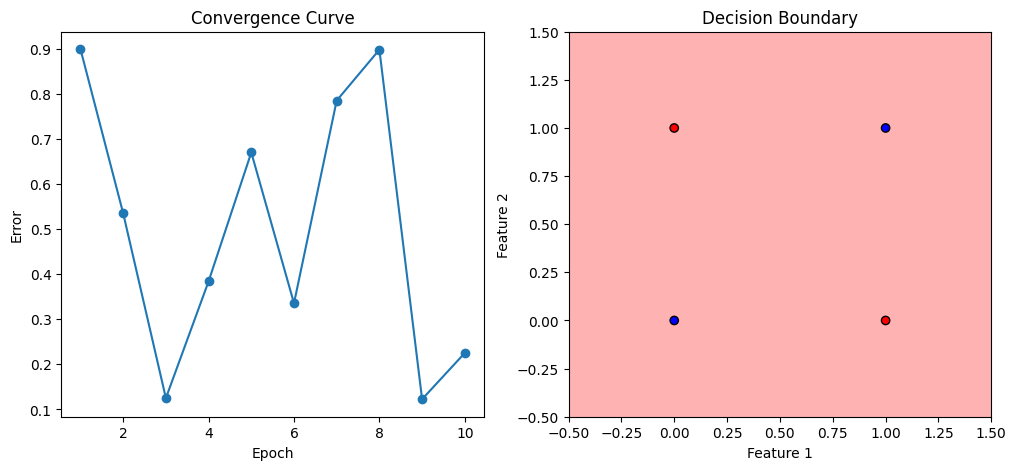

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def activation(x):
    return np.where(x >= 0, 1, 0)

def xor_network(X):
    # Define the weights and biases for the McCulloch-Pitts neurons
    W1 = np.array([[1, 1], [1, 1], [-1, -1]])
    b1 = np.array([-1, -1, 2])
    
    W2 = np.array([[1, -1, -1]])
    b2 = np.array([-0.5])
    
    # Compute the outputs of the first layer
    z1 = np.dot(X, W1.T) + b1
    a1 = activation(z1)
    
    # Compute the outputs of the second layer
    z2 = np.dot(a1, W2.T) + b2
    a2 = activation(z2)
    
    return a2

# Define XOR inputs and targets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Run the network
outputs = xor_network(X)

# Dummy error data for convergence curve (assuming 10 epochs for visualization)
epochs = np.arange(1, 11)
errors = np.random.uniform(0, 1, len(epochs))  # Random error values for demonstration

plt.figure(figsize=(12, 5))

# Convergence Curve (dummy)
plt.subplot(1, 2, 1)
plt.plot(epochs, errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Convergence Curve')

# Decision Boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = xor_network(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Use only the first output for contour

plt.subplot(1, 2, 2)
# Contour plot for decision boundary regions
contour = plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.1, 0.1], colors=['red', 'blue'])
# Contour lines for decision boundary
plt.contour(xx, yy, Z, levels=[0], colors='red', linestyles='--')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.bwr)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

plt.show()
